1. What is unsupervised learning?
  - Unsupervised learning finds patterns or structure in data without labels.
  - Example: clustering customers based on behavior.
2. How does K-Means clustering work?
  - Choose K clusters
  - Randomly initialize K centroids
  - Assign points to nearest centroid
  - Update centroids (mean of points)
  - Repeat until convergence
3. What is a dendrogram?
  - A tree-like diagram used in hierarchical clustering to show how clusters merge or split at different distances.
4. Difference between K-Means and Hierarchical clustering
- K-Means	Hierarchical
Needs K in advance	No need to specify K
Fast	Slower
- Flat clustering	Tree-based
Sensitive to noise	More flexible
5. Advantages of DBSCAN over K-Means
 - No need to specify K
 - Finds arbitrary-shaped clusters
 - Detects outliers/noise
 - Better for real-world noisy data
6. When to use Silhouette Score?
 - To evaluate clustering quality and choose optimal K.
 - Range: -1 to +1
 - Near +1 → good clusters
 - Near 0 → overlapping
 - Negative → wrong clustering
7. Limitations of Hierarchical Clustering
 - Computationally expensive
 - Difficult for large datasets
 - Once merged, cannot undo
8. Why is feature scaling important in clustering?
 - Clustering uses distance calculations.
 - Unscaled features can dominate distances and give wrong clusters.
9. How does DBSCAN identify noise?
Points that:
 - Do not have enough neighbors within eps
And are not reachable from core points
→ marked as noise (-1)
10. What is inertia in K-Means?
 - Inertia = Sum of squared distances of points from their cluster centroid.
 - Lower inertia → tighter clusters.
 11. What is the elbow method?
 - A method to choose optimal K by plotting:
  K vs Inertia
 - The “elbow point” is the best K.
 12. What is density in DBSCAN?
 - Density = number of points within a radius (eps).
 - Clusters are formed in high-density regions.
13. Can hierarchical clustering be used on categorical data?
 - Yes, using:
 - Proper distance metrics (e.g., Jaccard)
 - Encoding methods
14. What does a negative silhouette score mean?
 - The data point is closer to another cluster than its own → poor clustering.
15. What is linkage criteria?
 - Method to measure distance between clusters:
 - Single
 - Complete
 - Average
 - Ward
16. Why does K-Means perform poorly with varying densities?
 - K-Means assumes:
 - Equal cluster size
 - Spherical clusters
 - Fails when densities or shapes differ.
17. Core parameters of DBSCAN
 - eps → neighborhood radius
 - min_samples → minimum points to form a cluster
18. How does K-Means++ improve K-Means?
 - Smarter centroid initialization
 - Reduces poor clustering
 - Faster convergence
19. What is agglomerative clustering?
 - Bottom-up hierarchical clustering:
 - Start with each point as a cluster
 - Merge closest clusters step by step
20. Why is Silhouette better than inertia?
 - Inertia always decreases with K
 - Silhouette considers both cohesion & separation


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs, make_moons, make_circles, load_iris, load_wine, load_digits, load_breast_cancer
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import dendrogram, linkage


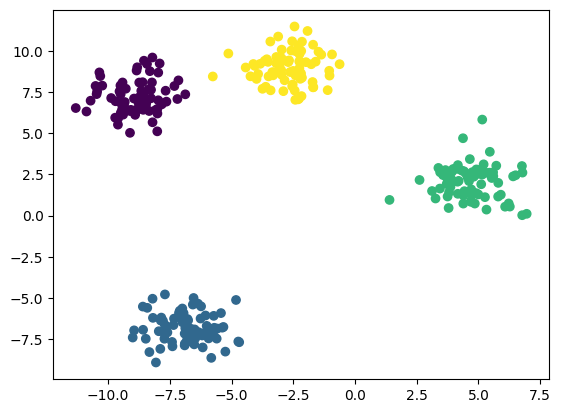

In [2]:
#21. Synthetic data (4 centers) + KMeans
X, _ = make_blobs(n_samples=300, centers=4, random_state=42)
kmeans = KMeans(n_clusters=4)
labels = kmeans.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=labels)
plt.show()


In [3]:
#22. Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=3)
labels = agg.fit_predict(X)
print(labels[:10])


[0 0 0 1 0 1 2 1 0 2]


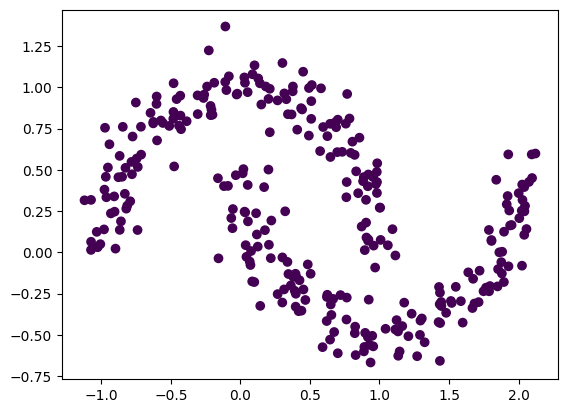

In [4]:
#23. make_moons + DBSCAN
X, _ = make_moons(n_samples=300, noise=0.1)
db = DBSCAN(eps=0.3)
labels = db.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=labels)
plt.show()


In [5]:
#24. Wine dataset + KMeans
wine = load_wine()
X = StandardScaler().fit_transform(wine.data)

kmeans = KMeans(n_clusters=3)
labels = kmeans.fit_predict(X)

print(np.bincount(labels))


[59 92 27]


In [ ]:
#25. make_circles + DBSCAN
X, _ = make_circles(n_samples=300, noise=0.05)
db = DBSCAN(eps=0.2)
labels = db.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=labels)
plt.show()


In [6]:
#26. Breast Cancer + KMeans
data = load_breast_cancer()
X = MinMaxScaler().fit_transform(data.data)

kmeans = KMeans(n_clusters=2)
labels = kmeans.fit_predict(X)
print(np.unique(labels))


[0 1]


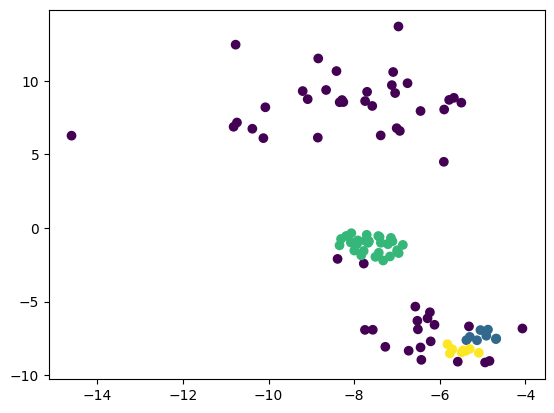

In [7]:
#27. Varying std blobs + DBSCAN
X, _ = make_blobs(cluster_std=[1,2,0.5])
labels = DBSCAN(eps=0.5).fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=labels)
plt.show()


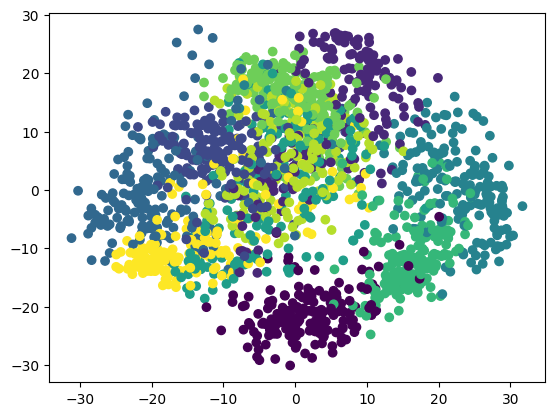

In [8]:
#28. Digits → PCA (2D)
digits = load_digits()
X = PCA(2).fit_transform(digits.data)

plt.scatter(X[:,0], X[:,1], c=digits.target)
plt.show()


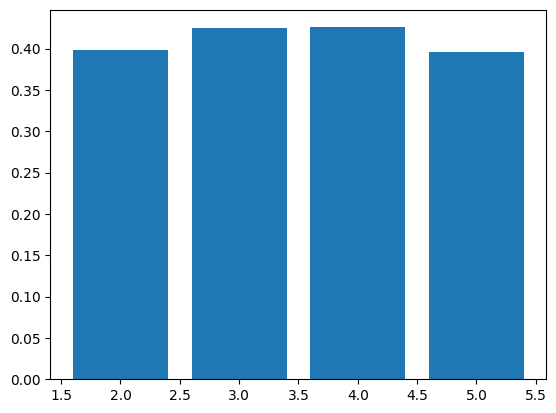

In [9]:
#29. Silhouette scores for K
scores = []
for k in range(2,6):
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(X)
    scores.append(silhouette_score(X, labels))

plt.bar(range(2,6), scores)
plt.show()


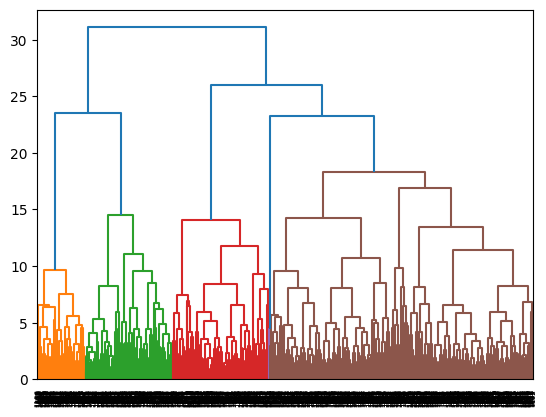

In [10]:
#30. Hierarchical + Dendrogram
linked = linkage(X, method='average')
dendrogram(linked)
plt.show()


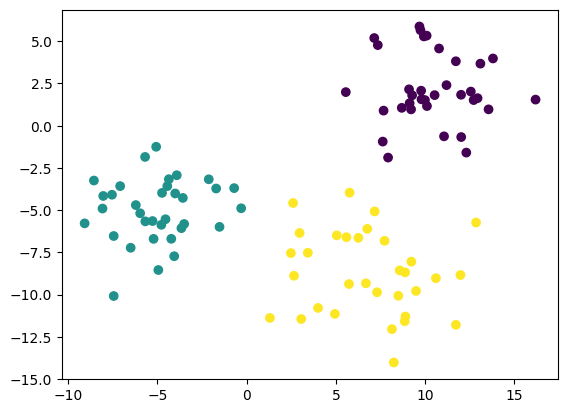

In [11]:
#31. Overlapping blobs
X, _ = make_blobs(cluster_std=2.5)
labels = KMeans(3).fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=labels)
plt.show()


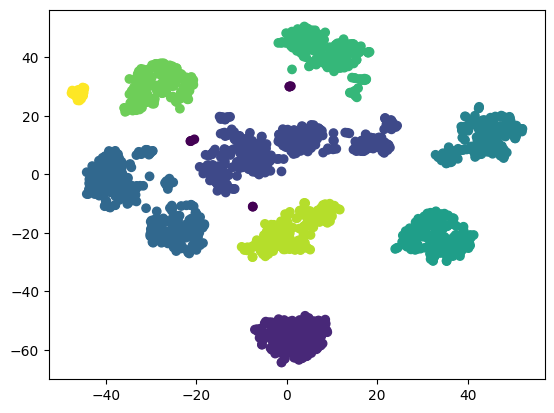

In [12]:
#32. Digits + t-SNE + DBSCAN
X = TSNE(2).fit_transform(load_digits().data)
labels = DBSCAN(eps=5).fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=labels)
plt.show()


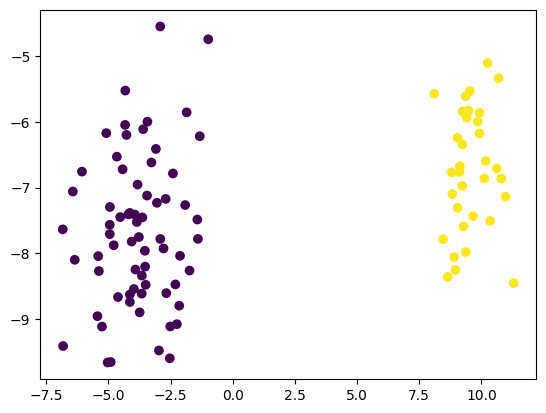

In [13]:
#33. make_blobs + Agglomerative
X, _ = make_blobs()
labels = AgglomerativeClustering(linkage='complete').fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=labels)
plt.show()


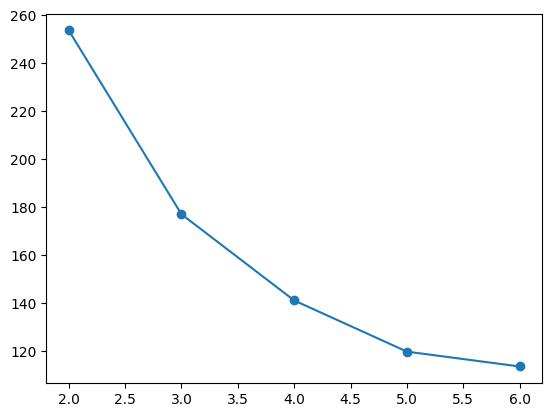

In [14]:
#34. Inertia for K=2 to 6
inertia = []
for k in range(2,7):
    inertia.append(KMeans(k).fit(X).inertia_)

plt.plot(range(2,7), inertia, marker='o')
plt.show()


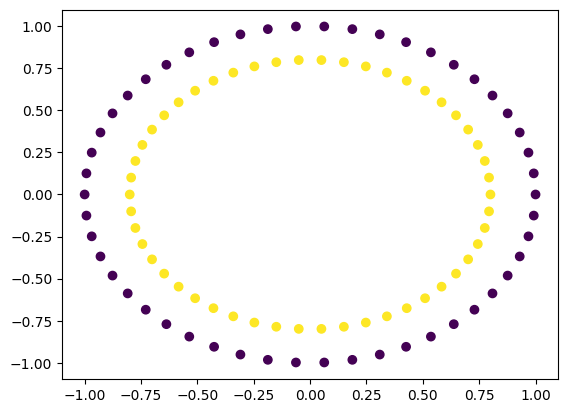

In [15]:
#35. Concentric circles + Agglomerative
X, _ = make_circles()
labels = AgglomerativeClustering(2, linkage='single').fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=labels)
plt.show()


In [16]:
#36. Wine + DBSCAN
wine = load_wine()
X = StandardScaler().fit_transform(wine.data)
labels = DBSCAN(eps=1.5).fit_predict(X)
print(len(set(labels)) - (1 if -1 in labels else 0))


0


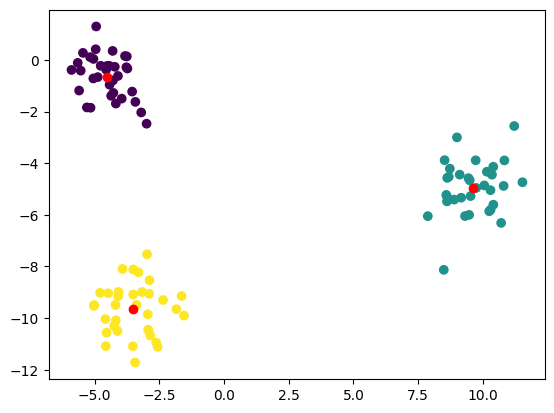

In [17]:
#37. Cluster centers
X,_ = make_blobs()
kmeans = KMeans(3).fit(X)
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red')
plt.show()


In [18]:
#38. Iris + DBSCAN
iris = load_iris()
labels = DBSCAN(eps=0.8).fit_predict(iris.data)
print(np.sum(labels == -1))


2


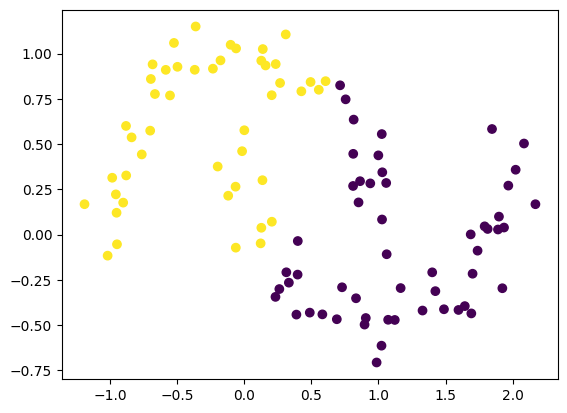

In [19]:
#39. make_moons + KMeans
X,_ = make_moons(noise=0.1)
labels = KMeans(2).fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=labels)
plt.show()


In [20]:
#40. Digits + PCA (3D)
X = PCA(3).fit_transform(load_digits().data)
print(X.shape)


(1797, 3)


In [21]:
#41. Blobs + Silhouette
X,_ = make_blobs(centers=5)
labels = KMeans(5).fit_predict(X)
print(silhouette_score(X, labels))


0.6671697411038535


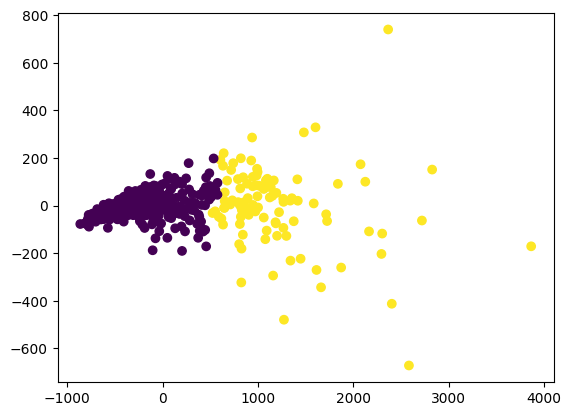

In [22]:
#42. Breast Cancer + PCA + Agglomerative
data = load_breast_cancer()
X = PCA(2).fit_transform(data.data)
labels = AgglomerativeClustering(2).fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=labels)
plt.show()


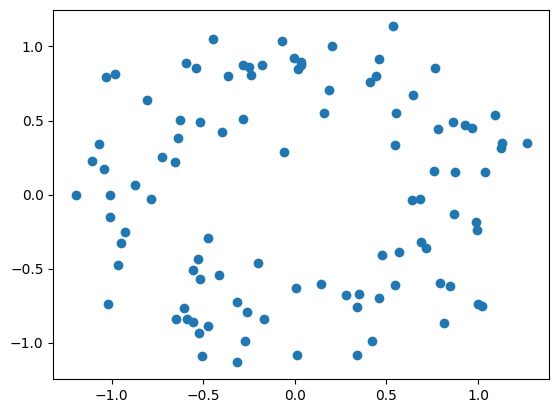

In [23]:
#43. Noisy circles
X,_ = make_circles(noise=0.2)
plt.scatter(X[:,0], X[:,1])
plt.show()


In [25]:
#44. Silhouette for each sample
# X is currently make_circles data (100 samples) from cell WqfukzO1fSIf
# labels in kernel are from breast cancer data (569 samples) from cell SVfARqP3fI2i
# This mismatch causes the ValueError.

# To fix, re-cluster the current X to get consistent labels.
# Using DBSCAN as it's often suitable for make_circles data.
db = DBSCAN(eps=0.2, min_samples=5) # Example parameters, can be tuned
labels = db.fit_predict(X)

vals = silhouette_samples(X, labels)
print(vals[:10])

[-0.52881867  0.79798242 -0.50685627 -0.78157354 -0.76408734 -0.69747656
  0.84371664 -0.75754105 -0.44185882 -0.63025007]


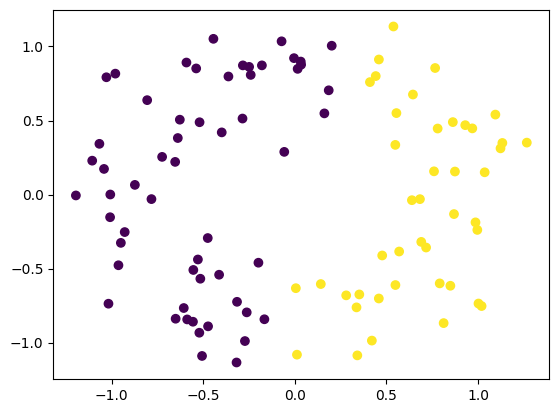

In [26]:
#45. make_blobs + Agglomerative (average)
labels = AgglomerativeClustering(linkage='average').fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=labels)
plt.show()


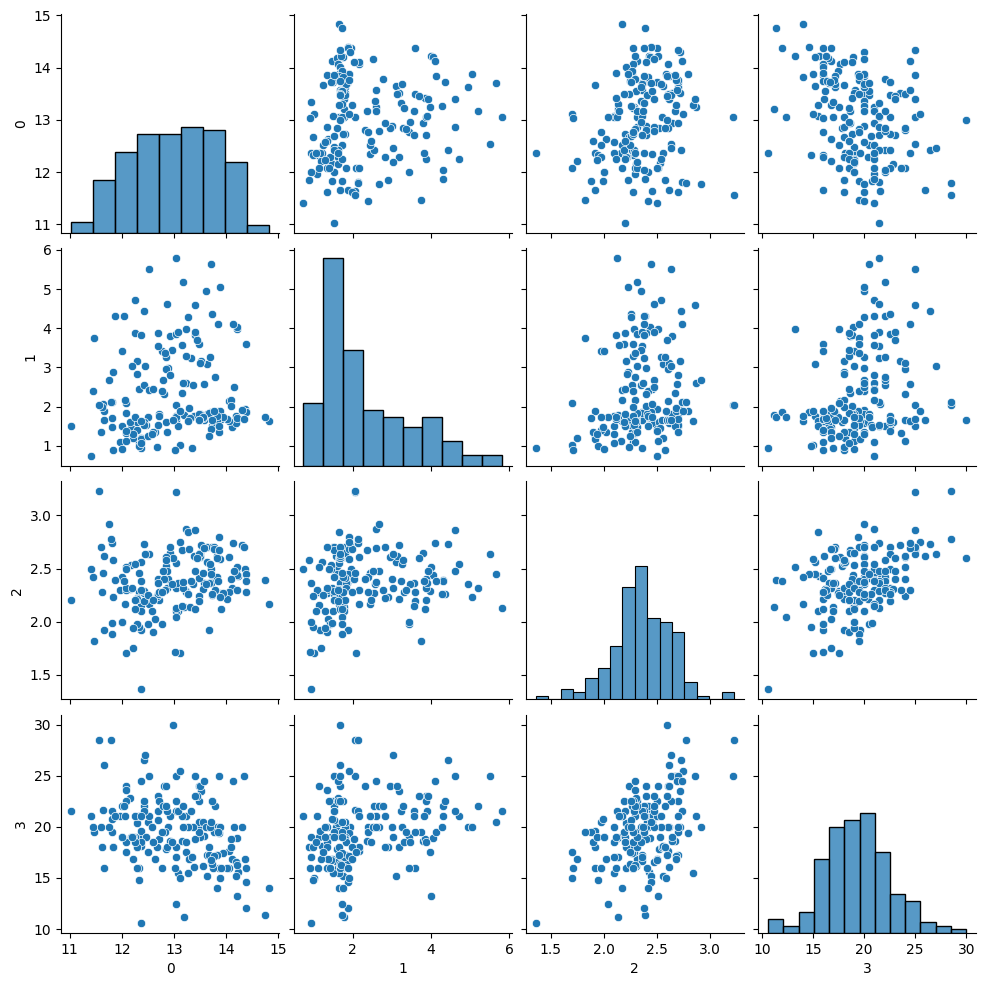

In [27]:
#46. Wine + pairplot
df = pd.DataFrame(load_wine().data[:, :4])
sns.pairplot(df)
plt.show()


In [28]:
#47. Noisy blobs + DBSCAN
X,_ = make_blobs(cluster_std=2.5)
labels = DBSCAN(eps=0.6).fit_predict(X)
print("Noise points:", np.sum(labels == -1))


Noise points: 100


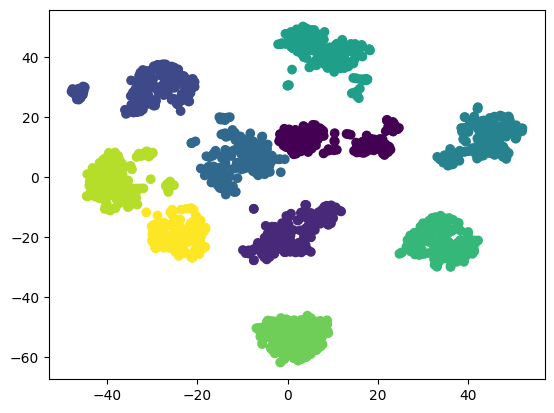

In [29]:
#48. Digits + t-SNE + Agglomerative
X = TSNE(2).fit_transform(load_digits().data)
labels = AgglomerativeClustering(10).fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=labels)
plt.show()
